In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
save_path = '' #LO's path
# save_path = './fig/' #YC's path

## Functions to simulate PCR

In [3]:
def sim_random_access_eff_uniFileSize(primer_specs):
    pool_size, n_row, n_col = primer_specs
    max_file_size = 1
    pool = np.reshape(np.ones(pool_size), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[:,col] = pool[:,col]*(1+amp_efficiency)*cycle
            pool_pcr[row,:] = pool[row,:]*(1+amp_efficiency)*cycle
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            ra_eff_afPCR_list.append(100.0*pool_pcr[row,col]/np.sum(pool_pcr))
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list)

def sim_random_access_eff_ranFileSize(primer_specs):
    np.random.seed(42)
    pool_size, n_row, n_col = primer_specs
    max_file_size = 100
    pool = np.random.randint(low=1, high=max_file_size, size=(n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[:,col] = pool[:,col]*(1+amp_efficiency)*cycle
            pool_pcr[row,:] = pool[row,:]*(1+amp_efficiency)*cycle
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            ra_eff_afPCR_list.append(100.0*pool_pcr[row,col]/np.sum(pool_pcr))
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
    ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list)

def sim_random_access_eff_linspaceFileSize(primer_specs):
    pool_size, n_row, n_col = primer_specs
    max_file_size = 100
    pool = np.reshape(np.linspace(1,max_file_size, num=pool_size), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_afPCR_list, ra_eff_bfPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[:,col] = pool[:,col]*(1+amp_efficiency)*cycle
            pool_pcr[row,:] = pool[row,:]*(1+amp_efficiency)*cycle
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            ra_eff_afPCR_list.append(100.0*pool_pcr[row,col]/np.sum(pool_pcr))
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
    ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list)

## Functions to shape and plot the PCR simulation data


In [4]:
def make_pcr_sim_dict_subfigs(ra_eff_bfPCR, ra_eff_afPCR, pspec, sim_pcr, method):
    bf_col_label = method + "-" + "Before PCR"
    af_col_label = method + '-' + 'After PCR'
    if bf_col_label not in sim_pcr.keys(): # initialize dictionary if needed
        sim_pcr[bf_col_label] = []
        sim_pcr[af_col_label] = []
    for i in range(len(ra_eff_bfPCR)):
        # only initialize this once, it's identical order for all methods
        # NOTE- CHANGE THIS IF YOU CHANGE NUMBER OF FILES BEING ANALYZED
        if len(sim_pcr['Number of Files']) < 11124: 
            sim_pcr['Number of Files'].append(pspec[0])
        sim_pcr[bf_col_label].append(ra_eff_bfPCR[i]) # before PCR
        sim_pcr[af_col_label].append(ra_eff_afPCR[i]) # after PCR
    return sim_pcr

def boxplots_sim_pcr_data_subfigs(sim_pcr, save_path, fname):
    """ 
    Given a panda dataframe of simulated PCR data, a string that is the title of the plot,
    a string that is the path to save the image (i.e., './dir/'), 
    and a string that is the saved file's name (i.e., 'my_fig.png'),
    saves a box plot of the data
    """
    # setting up plot(s)
    bfpcr_ymin, bfpcr_ymax = 0, 2.01
    afpcr_ymin, afpcr_ymax = 0, 100
    
    sns.set_theme(style="whitegrid")
    sns.set_context("talk")

    fig, axes = plt.subplots(2, 3, sharex=True, figsize=(18, 10))
    fig.suptitle('Simulated File Behavior Before and After PCR')
    ylab = 'Percent of Pool'
    
    # plotting data
    
    sns.boxplot(ax=axes[0, 0], data=sim_pcr, x='Number of Files', y='Uniform File Size-Before PCR')
    sns.stripplot(ax=axes[0, 0], data=sim_pcr, x="Number of Files", y="Uniform File Size-Before PCR", dodge=True)
    axes[0,0].set_title('Uniform File Size')
    axes[0,0].set_ylabel(ylab)
    axes[0,0].set_xlabel('')
    axes[0,0].set_ylim(bfpcr_ymin,bfpcr_ymax)
    
    sns.boxplot(ax=axes[1, 0], data=sim_pcr, x='Number of Files', y='Uniform File Size-After PCR')
    sns.stripplot(ax=axes[1, 0], data=sim_pcr, x="Number of Files", y="Uniform File Size-After PCR", dodge=True)
    axes[1,0].set_title('Uniform File Size')
    axes[1,0].set_ylabel(ylab)
    axes[1,0].set_ylim(afpcr_ymin, afpcr_ymax)
    
    sns.boxplot(ax=axes[0, 1], data=sim_pcr, x='Number of Files', y='Linearly Spaced File Sizes-Before PCR')
    sns.stripplot(ax=axes[0, 1], data=sim_pcr, x="Number of Files", y="Linearly Spaced File Sizes-Before PCR", dodge=True)
    axes[0,1].set_title('Linearly Spaced File Sizes')
    axes[0,1].set_ylabel('')
    axes[0,1].set_xlabel('')
    axes[0,1].set_ylim(bfpcr_ymin, bfpcr_ymax)
    
    sns.boxplot(ax=axes[1, 1], data=sim_pcr, x='Number of Files', y='Linearly Spaced File Sizes-After PCR')
    sns.stripplot(ax=axes[1, 1], data=sim_pcr, x="Number of Files", y="Linearly Spaced File Sizes-After PCR", dodge=True)
    axes[1,1].set_title('Linearly Spaced File Sizes')
    axes[1,1].set_ylabel('')
    axes[1,1].set_ylim(afpcr_ymin, afpcr_ymax)
    
    sns.boxplot(ax=axes[0, 2], data=sim_pcr, x='Number of Files', y='Randomly Generated File Size-Before PCR')
    sns.stripplot(ax=axes[0, 2], data=sim_pcr, x="Number of Files", y='Randomly Generated File Size-Before PCR', dodge=True)
    axes[0,2].set_title('Randomly Generated File Size')
    axes[0,2].set_ylabel('')
    axes[0,2].set_xlabel('')
    axes[0,2].set_ylim(bfpcr_ymin, bfpcr_ymax)

    sns.boxplot(ax=axes[1, 2], data=sim_pcr, x='Number of Files', y='Randomly Generated File Size-After PCR')
    sns.stripplot(ax=axes[1, 2], data=sim_pcr, x="Number of Files", y="Randomly Generated File Size-After PCR", dodge=True)
    axes[1,2].set_title('Randomly Generated File Size')
    axes[1,2].set_ylabel('')
    axes[1,2].set_ylim(afpcr_ymin, afpcr_ymax)
    
    # annotations
    bfpcr = 'Before PCR'
    afpcr = 'After PCR'
    plt.gcf().text(-.02,.7, bfpcr, fontsize=20)
    plt.gcf().text(-.02,.29, afpcr, fontsize=20)
    
    # saving and showing
    filename = save_path + fname
    plt.savefig(filename, dpi=900, bbox_inches='tight')
    plt.show()
    plt.clf()

## Perform and plot PCR simulations

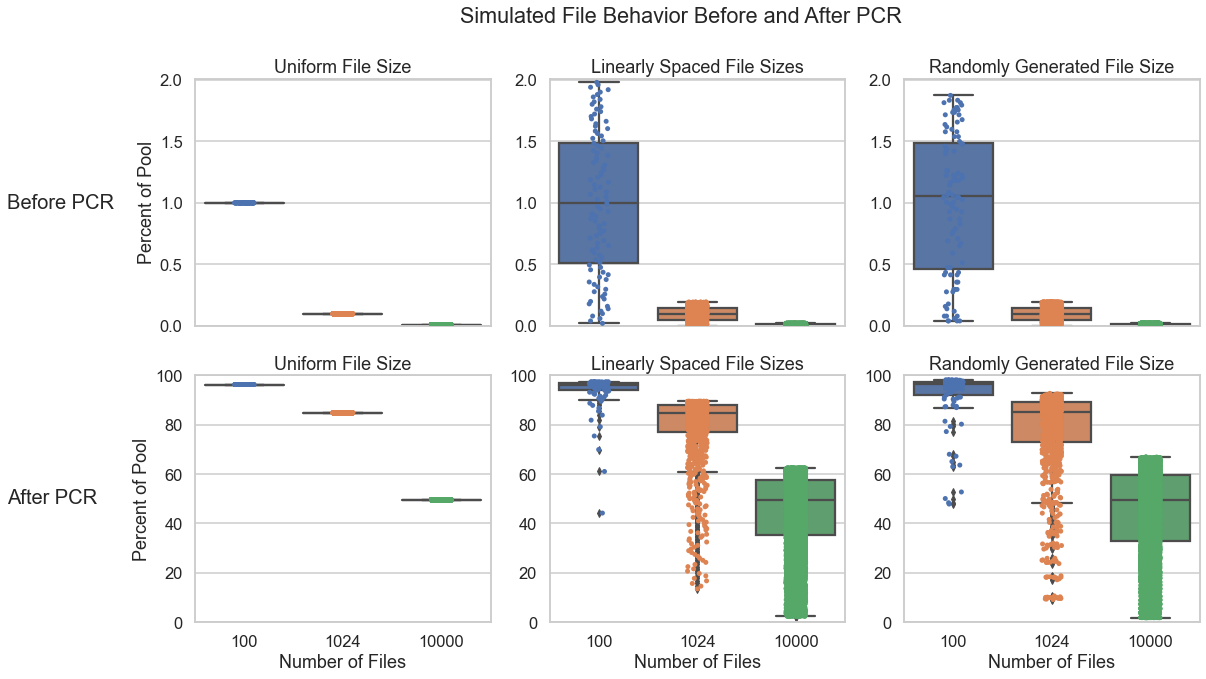

<Figure size 432x288 with 0 Axes>

In [5]:
primer_specs_to_analyze = [[100,10,10], [1024, 32, 32], [10000, 100,100]]
sim_pcr = {"Number of Files": []}
methods = ["Uniform File Size", "Randomly Generated File Size", "Linearly Spaced File Sizes"]

for method in methods:
    for pspec in primer_specs_to_analyze:
        if method == "Uniform File Size":
            ra_eff_bfPCR, ra_eff_afPCR = sim_random_access_eff_uniFileSize(pspec)
        elif method == "Linearly Spaced File Sizes":
            ra_eff_bfPCR, ra_eff_afPCR = sim_random_access_eff_linspaceFileSize(pspec)
        elif method == "Randomly Generated File Size":
            ra_eff_bfPCR, ra_eff_afPCR = sim_random_access_eff_ranFileSize(pspec)
        else:
            print ("error")
        sim_pcr = make_pcr_sim_dict_subfigs(ra_eff_bfPCR, ra_eff_afPCR, pspec, sim_pcr, method)
        
sim_pcr = pd.DataFrame(sim_pcr)

boxplots_sim_pcr_data_subfigs(sim_pcr, save_path, 'box_pcr_sim_fig_1xto100X.png')